## HW3

**exercise 1.2
Go to http://freesound.org and download a sound sample that includes music, speech, or other sounds that have a well-defined pitch. Select a roughly half-second segment where the pitch is constant. Compute and plot the spectrum of the segment you selected. What connection can you make between the timbre of the sound and the harmonic structure you see in the spectrum?**

휴먼지능정보공학과 201910803 박채희

In [1]:
from thinkdsp import read_wave

wave = read_wave('460261__ddmyzik__piano-jingle.wav')
wave.normalize()
wave.make_audio()

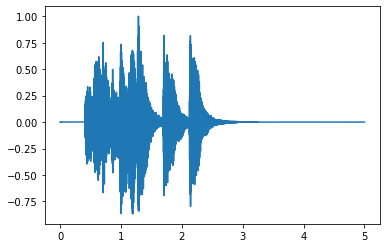

In [2]:
wave.plot()

### Select a roughly half-second segment where the pitch is constant

In [14]:
segment = wave.segment(start=0.45, duration=0.5)
segment.make_audio()

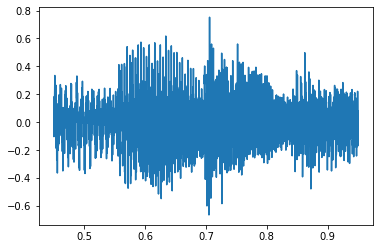

In [15]:
segment.plot()

### Compute and plot the spectrum of the segment 

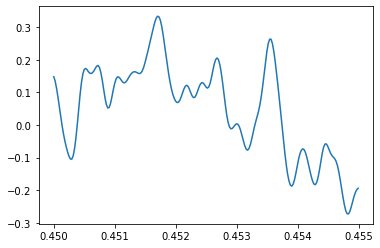

In [5]:
segment.segment(start=0.45, duration=0.005).plot()

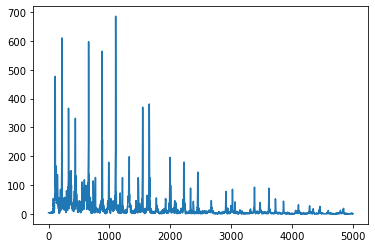

In [6]:
spectrum = segment.make_spectrum()
spectrum.plot(high=5000)

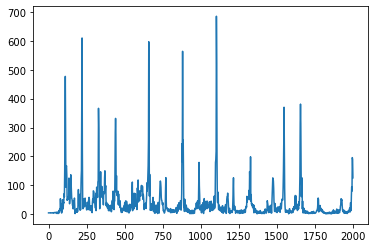

In [7]:
spectrum = segment.make_spectrum()
spectrum.plot(high=2000)

In [8]:
spectrum.peaks()[:30]

[(685.4531835113419, 1102.0),
 (610.1650707792166, 220.0),
 (597.073256235963, 658.0),
 (564.0416922340628, 880.0),
 (522.6041458719094, 1104.0),
 (477.0809750576549, 110.0),
 (430.7686075645319, 218.0),
 (381.0619642492119, 1654.0),
 (370.1760753582877, 1546.0),
 (366.4762980448053, 328.0),
 (355.69551407316595, 660.0),
 (331.5793336462363, 440.0),
 (316.01502257818805, 1652.0),
 (313.89519641780055, 1656.0),
 (301.5413518767069, 108.0),
 (292.6186144889344, 330.0),
 (284.5606913279855, 438.0),
 (280.8823242316299, 112.0),
 (275.28843190475885, 442.0),
 (256.9988320765598, 884.0),
 (252.68016406149928, 656.0),
 (243.50441949073522, 876.0),
 (240.98031180156391, 1544.0),
 (228.1879411844699, 1548.0),
 (223.06736891215192, 222.0),
 (217.4746972384955, 1100.0),
 (205.87608281299512, 882.0),
 (198.47905609784485, 1326.0),
 (195.72679006989367, 1994.0),
 (189.47424441038987, 1106.0)]

In [9]:
spectrum.low_pass(2000)

In [10]:
spectrum.make_wave().make_audio()

### connection between the timbre of the sound and the harmonic structure

In [16]:
from thinkdsp import decorate
from IPython.display import display

def filter_wave(wave, start, duration, cutoff):
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(high=5000, color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(high=5000, color='#045a8d')
    decorate(xlabel='Frequency (Hz)')
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

In [17]:
from ipywidgets import interact, fixed

interact(filter_wave, wave=fixed(wave), 
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 5000, 100));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…